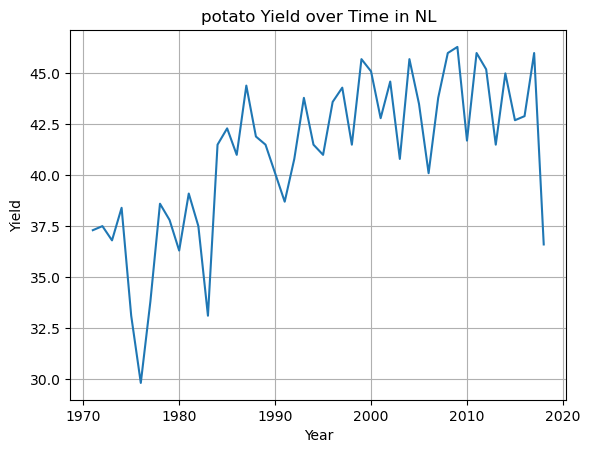

Initial Params: [0.01 0.1  0.2  0.6 ]
Initial Likelihood: -1815.7758893167313
`xtol` termination condition is satisfied.
Number of iterations: 30, function evaluations: 160, CG iterations: 60, optimality: 1.27e+03, constraint violation: 0.00e+00, execution time: 0.026 s.
Final Params: [0.23814175 0.3023504  0.71251581 0.91187999]
Final Likelihood: -124.6211054223774

Kessler MLE: 
params      | [0.23814175 0.3023504  0.71251581 0.91187999] 
sample size | 47 
likelihood  | -124.6211054223774 
AIC         | 257.2422108447548
BIC         | 264.642801251595
Initial Params: [0.01 0.1  0.2  0.6 ]
Initial Likelihood: -1816.13843384416
`xtol` termination condition is satisfied.
Number of iterations: 58, function evaluations: 410, CG iterations: 145, optimality: 5.27e-01, constraint violation: 0.00e+00, execution time: 0.059 s.
Final Params: [0.20868796 0.11337703 0.88263863 0.88062477]
Final Likelihood: -124.3386767774297

Shoji-Ozaki MLE: 
params      | [0.20868796 0.11337703 0.88263863 0.880

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymle.models.CKLS import CKLS
from pymle.core.TransitionDensity import KesslerDensity, ShojiOzakiDensity
from pymle.fit.AnalyticalMLE import AnalyticalMLE

# Step 1: Load the first dataset (actual yield data)
file_path = '../datasets/CropSDEData/YIELD_NUTS0_NL.csv'
data = pd.read_csv(file_path)

# Step 2: Filter the dataset for a specific crop and region (e.g., "potato" and "NL")
crop_name = 'potato'
region_code = 'NL'
filtered_data = data[(data['CROP'] == crop_name) & (data['IDREGION'] == region_code)]

# Extract years and yield data
years = filtered_data['FYEAR'].values
yield_data = filtered_data['YIELD'].values

# Step 3: Normalize the time step and sample the data
skip = 1
dt = skip / (max(years) - min(years))  # Time interval normalized over the years
sample = yield_data[::skip]  # Sampled yield data

# Step 4: Define the CKLS model and parameter bounds
model = CKLS()
param_bounds = [(0.0, 10), (0.0, 10), (0.01, 3), (0.1, 2)]
guess = np.array([0.01, 0.1, 0.2, 0.6])

# Plot the original yield data for reference
plt.plot(years, yield_data, label=f'{crop_name} Yield Data ({region_code})')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title(f'{crop_name} Yield over Time in {region_code}')
plt.grid(True)
plt.show()

# Step 5: Fit the model using different Maximum Likelihood Estimators (MLE)

# Fit using Kessler MLE
kessler_est = AnalyticalMLE(sample=sample, param_bounds=param_bounds, dt=dt, density=KesslerDensity(model)).estimate_params(guess)
print(f'\nKessler MLE: {kessler_est}')

# Fit using Shoji-Ozaki MLE
shojioz_est = AnalyticalMLE(sample=sample, param_bounds=param_bounds, dt=dt, density=ShojiOzakiDensity(model)).estimate_params(guess)
print(f'\nShoji-Ozaki MLE: {shojioz_est}')
